In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
df = pd.read_csv('PowerConsumptionCleaned.txt')
dataset = df.copy()

C:\Users\stealthyshampoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#Impute the mean for missing float values
#Drop rows that are missing date and time values.
dataset = dataset.replace('?',np.NaN)
dataset = dataset.dropna(subset=['Date']) 
dataset = dataset.dropna(subset=['Time'])

**Clustering**

In [11]:
#Adding Date and Time to Float Equivalents to dataset
DateTime = dataset.Date + ' ' + dataset.Time
DateTime

timeStamp = DateTime.apply(lambda x: pd.to_datetime(x,format = '%d-%m-%Y %H:%M:%S'))
timeStamp

floatDate = timeStamp.view('int64')//pd.Timedelta(1,unit='s')
floatDate

timeOf24 = timeStamp.apply(lambda x: x.time().hour+x.time().minute/60+x.time().second/3600)
timeOf24

dataset['timeOf24'] = timeOf24
dataset['floatDate'] = floatDate
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timeOf24,floatDate
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,17.400000,1166289840
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0,17.416667,1166289900
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0,17.433333,1166289960
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0,17.450000,1166290020
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,17.466667,1166290080
5,16-12-2006,17:29:00,3.52,0.522,235.02,15,0,2,17.0,17.483333,1166290140
6,16-12-2006,17:30:00,3.702,0.52,235.09,15.8,0,1,17.0,17.500000,1166290200
7,16-12-2006,17:31:00,3.7,0.52,235.22,15.8,0,1,17.0,17.516667,1166290260
8,16-12-2006,17:32:00,3.668,0.51,233.99,15.8,0,1,17.0,17.533333,1166290320
9,16-12-2006,17:33:00,3.662,0.51,233.86,15.8,0,2,16.0,17.550000,1166290380


In [12]:
#Form Property Matrix
X = dataset.iloc[:,2:].values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

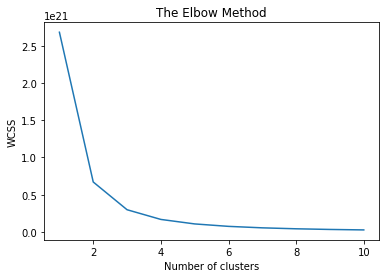

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_jobs = -2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

4 Clusters is optimal

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_jobs = -2)
dataset['y_kmeans'] = kmeans.fit_predict(X)
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timeOf24,floatDate,y_kmeans
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0,17.400000,1166289840,2
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0,17.416667,1166289900,2
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0,17.433333,1166289960,2
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0,17.450000,1166290020,2
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0,17.466667,1166290080,2
5,16-12-2006,17:29:00,3.52,0.522,235.02,15,0,2,17.0,17.483333,1166290140,2
6,16-12-2006,17:30:00,3.702,0.52,235.09,15.8,0,1,17.0,17.500000,1166290200,2
7,16-12-2006,17:31:00,3.7,0.52,235.22,15.8,0,1,17.0,17.516667,1166290260,2
8,16-12-2006,17:32:00,3.668,0.51,233.99,15.8,0,1,17.0,17.533333,1166290320,2
9,16-12-2006,17:33:00,3.662,0.51,233.86,15.8,0,2,16.0,17.550000,1166290380,2


**Regression**

The instructions for this project were somewhat confusion. The goals were Clustering and Regression, however Regression on its own is considered Supervised Learning and Clustering is Unsupervised Learning. The idea of setting up regression for the cluster value is ridiculous, so I won't follow through with regression.

I will instead use a classifer to test if accurate predictions can be made on the clusterings I have created.

In [47]:
# Importing the dataset
df = dataset.copy()
df = df.dropna(axis = 0, how = 'any')
X = df.iloc[:, 2:-1].values
y = df.iloc[:, 10].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\stealthyshampoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
### Visualizing the confusion matrix.
import seaborn as sns
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);